Autor: Gustavo Vilela Mitraud <br>
Universidade Presbiteriana Mackenzie

In [3]:
import pandas as pd
import numpy as np

base_steam = pd.read_csv("archive/steam.csv")
base_steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
def getUniques(df):
    uniques = df
    
    for i in range(len(uniques)):
        uniques[i] = uniques[i].split(";")
    
    uniques = sum(uniques, [])

    return np.unique(uniques)

steamspy_tags = getUniques(base_steam["steamspy_tags"])
steamspy_tags

/tmp/ipykernel_43668/527339633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniques[i] = uniques[i].split(";")


array(['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D',
       '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF',
       'Abstract', 'Action', 'Action RPG', 'Action-Adventure',
       'Adventure', 'Agriculture', 'Aliens', 'Alternate History',
       'America', 'Animation & Modeling', 'Anime', 'Arcade',
       'Arena Shooter', 'Assassin', 'Atmospheric', 'Audio Production',
       'BMX', 'Base-Building', 'Baseball', 'Basketball', 'Batman',
       'Battle Royale', "Beat 'em up", 'Beautiful', 'Benchmark', 'Bikes',
       'Blood', 'Board Game', 'Bowling', 'Building', 'Bullet Hell',
       'Bullet Time', 'CRPG', 'Capitalism', 'Card Game', 'Cartoon',
       'Cartoony', 'Casual', 'Cats', 'Character Action Game',
       'Character Customization', 'Chess', 'Choices Matter',
       'Choose Your Own Adventure', 'Cinematic', 'City Builder',
       'Class-Based', 'Classic', 'Clicker', 'Co-op', 'Cold War',
       'Colorful', 'Comedy', 'Comic Book', 'Competitive', 'Controll

Vamos agrupar todas as tags em categorias, para diminuir a grande dispersão dos dados

In [5]:
# A lista com a qual categoria cada tag pertence está no arquivo tags.txt

tags_file = open("tags.txt")
tags_lines = tags_file.readlines()

tags_lines = list(map(lambda x: x.rstrip(), tags_lines))
tags_lines

['Action:',
 '2D Fighter',
 'Action',
 'Action RPG',
 'Action Adventure',
 'Arena Shooter',
 'Battle Royale',
 "Beat 'em up",
 'Bullet hell',
 'Character Action Game',
 'FPS',
 'Fast-Paced',
 'Fighting',
 'Hack and Slash',
 'Heist',
 'MOBA',
 'Metroidvania',
 'On-Rails Shooter',
 'Parkour',
 'PvP',
 'Rogue-like',
 'Rogue-lite',
 "Shoot 'Em Up",
 'Shooter',
 'Sniper',
 'Souls-like',
 'Spectacle fighter',
 'Stealth',
 'Swordplay',
 'Third-Person Shooter',
 'Top-Down Shooter',
 'Twin Stick Shooter',
 '',
 'Role-Playing:',
 'Action RPG',
 'CRPG',
 'Choose Your Own Adventure',
 'Class-Based',
 'Crafting',
 'Dating Sim',
 'Grid-Based Movement',
 'JRPG',
 'MMORPG',
 'MOBA',
 'Metroidvania',
 'Mining',
 'Party-Based RPG',
 'RPG',
 'RPGMaker',
 'Rogue-like',
 'Rogue-lite',
 'Souls-like',
 'Strategy RPG',
 'Tactical RPG',
 'Turn-Based',
 'Turn-Based Combat',
 'Turn-Based Strategy',
 'Turn-Based Tatics',
 '',
 'Adventure:',
 '3D Platformer',
 'Action-Adventure',
 'Adventure',
 'Assassin',
 'Batma

In [6]:
tags_clusters_dict = dict()

cur_tag_cluster = ''

for index, line in enumerate(tags_lines):
    if line.endswith(":"):
        cur_tag_cluster = line
    
    elif cur_tag_cluster not in tags_clusters_dict:
        tags_clusters_dict[cur_tag_cluster] = []
    
    else:
        tags_clusters_dict[cur_tag_cluster].append(line)

tags_clusters_dict

{'Action:': ['Action',
  'Action RPG',
  'Action Adventure',
  'Arena Shooter',
  'Battle Royale',
  "Beat 'em up",
  'Bullet hell',
  'Character Action Game',
  'FPS',
  'Fast-Paced',
  'Fighting',
  'Hack and Slash',
  'Heist',
  'MOBA',
  'Metroidvania',
  'On-Rails Shooter',
  'Parkour',
  'PvP',
  'Rogue-like',
  'Rogue-lite',
  "Shoot 'Em Up",
  'Shooter',
  'Sniper',
  'Souls-like',
  'Spectacle fighter',
  'Stealth',
  'Swordplay',
  'Third-Person Shooter',
  'Top-Down Shooter',
  'Twin Stick Shooter',
  ''],
 'Role-Playing:': ['CRPG',
  'Choose Your Own Adventure',
  'Class-Based',
  'Crafting',
  'Dating Sim',
  'Grid-Based Movement',
  'JRPG',
  'MMORPG',
  'MOBA',
  'Metroidvania',
  'Mining',
  'Party-Based RPG',
  'RPG',
  'RPGMaker',
  'Rogue-like',
  'Rogue-lite',
  'Souls-like',
  'Strategy RPG',
  'Tactical RPG',
  'Turn-Based',
  'Turn-Based Combat',
  'Turn-Based Strategy',
  'Turn-Based Tatics',
  ''],
 'Adventure:': ['Action-Adventure',
  'Adventure',
  'Assassin'

In [7]:
recomendation_dict = {}

for i, game in enumerate(base_steam["steamspy_tags"]):
    if i not in recomendation_dict: recomendation_dict[i] = []

    for key in tags_clusters_dict.keys():
        if any(map(lambda v: v in game, tags_clusters_dict[key])):
            recomendation_dict[i].append(1)
        else: 
            recomendation_dict[i].append(0)
    

recomendation_dict


{0: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 1: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 3: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 4: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 5: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 6: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 7: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 8: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 9: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 10: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 11: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 12: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 13: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 14: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 15: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 16: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 17: [0, 0, 0, 0, 0, 1, 0, 0, 0],
 18: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 19: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 20: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 21: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 22: [1, 1, 0, 0, 0, 0, 0, 0, 0],
 23: [0, 0, 0, 0, 0, 1, 0, 0, 0],
 24: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 25: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 26: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 27: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 28: [1, 0, 0, 0, 0, 0, 1, 0, 0],
 29: [1, 0, 0, 0, 0, 0, 

In [8]:
recomendation_df = pd.DataFrame(recomendation_dict).transpose()

Agora vamos aplicar o algoritmo kmeans nessa base <br>
Testaremos com 5, 6, 9 n_clusters <br>

In [9]:
from sklearn.cluster import KMeans


kmeans_4 = KMeans(n_clusters=4).fit(pd.DataFrame(recomendation_df))
clusters_4 = kmeans_4.predict(pd.DataFrame(recomendation_df))

/home/gustavo_v_m/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
kmeans_6 = KMeans(n_clusters=6).fit(pd.DataFrame(recomendation_df))
clusters_6 = kmeans_6.predict(pd.DataFrame(recomendation_df))

/home/gustavo_v_m/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
kmeans_9 = KMeans(n_clusters=9).fit(pd.DataFrame(recomendation_df))
clusters_9 = kmeans_9.predict(pd.DataFrame(recomendation_df))

/home/gustavo_v_m/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


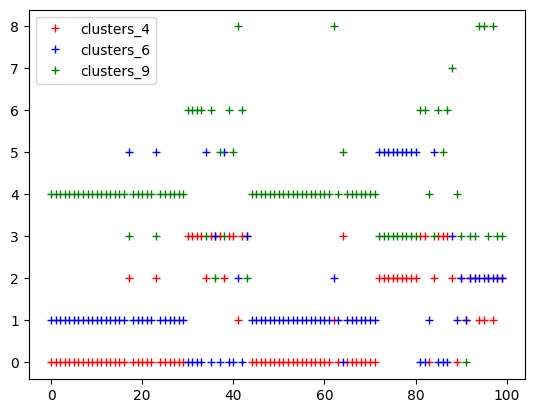

In [19]:
from matplotlib import pyplot as plt

x = range(100)
# plotando a lista com os clusters feitos com n_cluster = 4
plt.plot(x, clusters_4[:100].transpose(),label="clusters_4", color="r", ls= "None", marker="+")

# plotando a lista com os clusters feitos com n_cluster = 6
plt.plot(x, clusters_6[:100].transpose(),label="clusters_6", color="b", ls= "None", marker="+")

# plotando a lista com os clusters feitos com n_cluster = 9
plt.plot(x, clusters_9[:100].transpose(),label="clusters_9", color="g", ls= "None", marker="+")


plt.legend()

Agora, vamos testar o modelo

In [20]:
# Testando o modelo com n_clusters = 6
lookup_recomendation = {"game_name": [x.lower() for x in base_steam["name"]], "cluster": clusters_6}
lookup_recomendation = pd.DataFrame(lookup_recomendation)
lookup_recomendation

,game_name,cluster
0,counter-strike,1
1,team fortress classic,1
2,day of defeat,1
3,deathmatch classic,1
4,half-life: opposing force,1
...,...,...
27070,room of pandora,3
27071,cyber gun,4
27072,super star blast,1
27073,new yankee 7: deer hunters,3


In [21]:
import random

def get_recomendation(game, lookup):
    lookup = pd.DataFrame(lookup)
    cluster_to_recomend = int(lookup.loc[lookup["game_name"]==game]["cluster"])
    list_of_games = list(lookup.loc[lookup["cluster"]==cluster_to_recomend]["game_name"])
    return random.sample(list_of_games, 4)

get_recomendation("counter-strike".lower(), lookup_recomendation)

["the king of fighters '98 ultimate match final edition",
 'vr chair games',
 'blue estate the game',
 "medusa's labyrinth vr"]

Vamos usar um algoritmo de Nearest Neighbours para fazer a recomendação

In [22]:
from sklearn.neighbors import NearestNeighbors

# aplicando apenas para n_clusters = 6
dist_clusters = kmeans_6.transform(recomendation_df)
dist_clusters = pd.DataFrame(dist_clusters)
dist_clusters

,0,1,2,3,4,5
0,1.054523,0.300188,1.460901,1.496604,1.009051,1.426452
1,1.054523,0.300188,1.460901,1.496604,1.009051,1.426452
2,1.411377,1.022166,1.767374,1.785409,1.413848,1.697277
3,1.054523,0.300188,1.460901,1.496604,1.009051,1.426452
4,1.412996,1.012286,1.765815,1.778480,1.408796,1.721104
...,...,...,...,...,...,...
27070,1.453278,1.589085,1.065004,0.601445,1.380120,1.632793
27071,1.453278,1.044085,1.770376,1.113473,0.134849,1.622557
27072,1.453278,0.724702,1.065004,1.536794,1.380120,1.742058
27073,1.453278,1.589085,1.065004,0.601445,1.380120,1.632793


In [25]:
neighbours = NearestNeighbors(n_neighbors=5).fit(dist_clusters)

def get_recomendation_nn(game):
    index = base_steam.index[base_steam["name"]==game][0]
    neighbours_indexes = neighbours.kneighbors(np.array(dist_clusters.iloc[index]).reshape(1,-1))[1][0]
    return base_steam.iloc[neighbours_indexes]

get_recomendation_nn("Counter-Strike")

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,"[Action, FPS, Multiplayer]",0,3318,633,277,62,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,"[Action, FPS, Multiplayer]",0,1273,267,258,184,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,"[FPS, Classic, Action]",0,27755,1100,1300,83,5000000-10000000,7.19
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,10000000-20000000,7.19
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,"[Action, FPS, Multiplayer]",0,2758,684,175,10,5000000-10000000,3.99
